In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Librabries**

In [2]:
import numpy as np 
import pandas as pd 
import  cv2
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical



2025-06-02 18:42:56.407069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748889776.612553      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748889776.675001      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
A=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A")
B=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B")
C=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/C")
D=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/D")
E=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E")
F=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/F")
G=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/G")
H=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/H")
I=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/I")
J=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/J")
K=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/K")
L=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/L")
M=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/M")
N=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N")
O=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/O")
P=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/P")
Q=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Q")
R=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/R")
S=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/S")
T=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/T")
U=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/U")
V=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/V")
W=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/W")
X=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/X")
Y=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Y")
Z=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z")
delete=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/del")
nothing=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing")
space=os.listdir(r"/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space")


## **Making show image Function**

In [4]:
def show_img(path):
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    

**A**

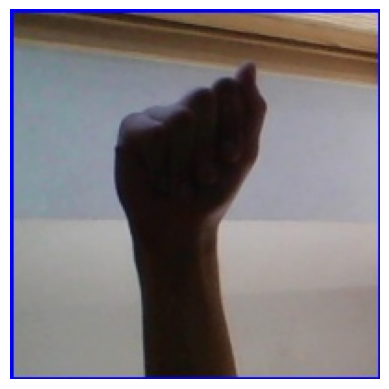

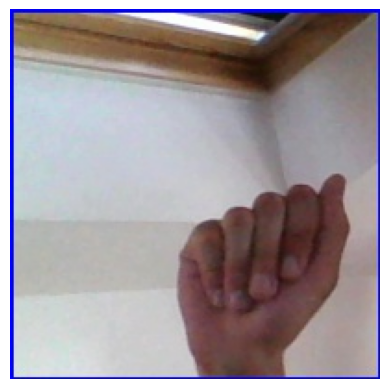

In [5]:
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg")
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1024.jpg")


**B**

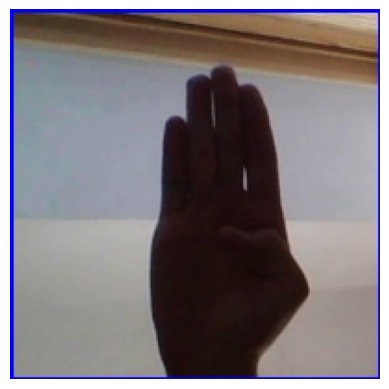

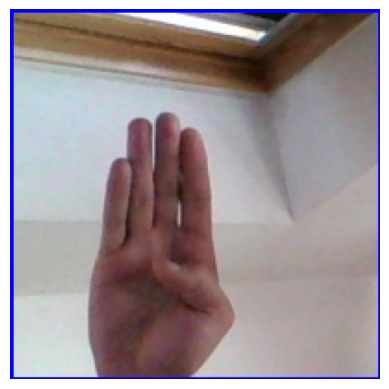

In [6]:
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B/B1.jpg")
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B/B1024.jpg")


**del**

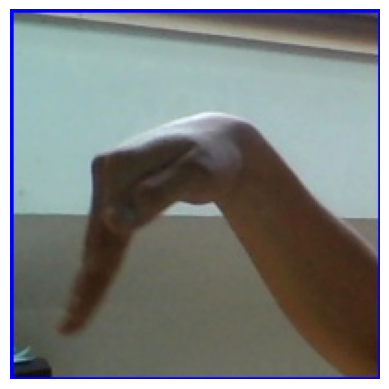

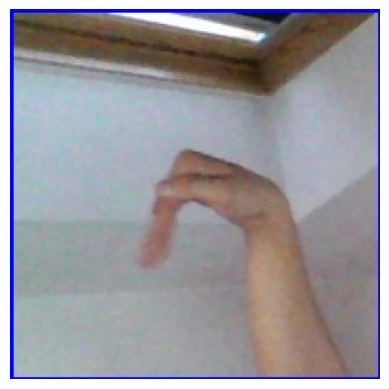

In [7]:
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/del/del1.jpg")
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/del/del1024.jpg")


**nothing**

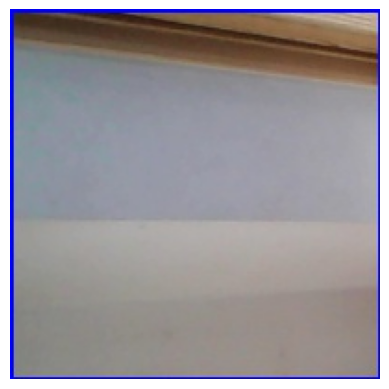

In [8]:
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1.jpg")


**Space**

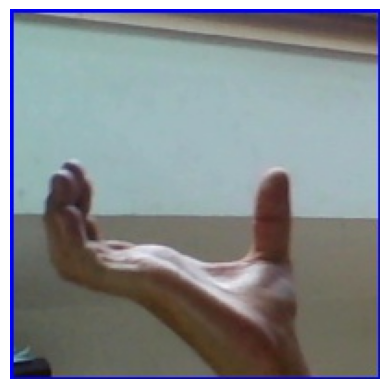

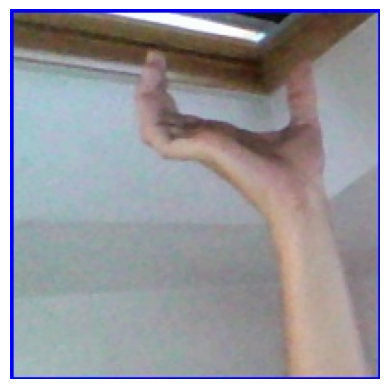

In [9]:
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space/space1.jpg")
show_img("/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space/space1024.jpg")

## **Creating Label for each word**

In [10]:
# Base path to dataset
base_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

# Labels and folder names
folders = [
    ("A", A), ("B", B), ("C", C), ("D", D), ("E", E), ("F", F), ("G", G), ("H", H),
    ("I", I), ("J", J), ("K", K), ("L", L), ("M", M), ("N", N), ("O", O), ("P", P),
    ("Q", Q), ("R", R), ("S", S), ("T", T), ("U", U), ("V", V), ("W", W), ("X", X),
    ("Y", Y), ("Z", Z), ("del", delete), ("nothing", nothing), ("space", space)
]

data = []
labels = []

# Loop through each folder
for label_name, image_list in folders:
    folder_path = os.path.join(base_path, label_name)
    
    for img_file in image_list:
        img_path = os.path.join(folder_path, img_file)
        
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))
            image = image.convert("RGB")
            image = np.array(image)
            data.append(image)
            labels.append(label_name)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [11]:
print("data",len(data))
print("Label",len(labels))
 

data 87000
Label 87000


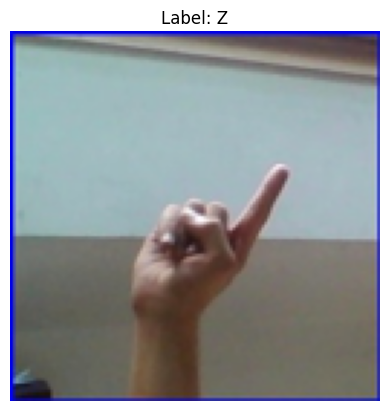

In [12]:
plt.imshow(data[75000])
plt.title(f"Label: {labels[75000]}")
plt.axis('off')
plt.show()


## **Spliting data**

In [13]:
x=np.array(data)
le = LabelEncoder()
y = le.fit_transform(labels)  


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


In [15]:
print("x_train :",x_train.shape,"----> y_train :",y_train.shape)
print("x_test :",x_test.shape,"----> y_test :",y_test.shape)

x_train : (69600, 128, 128, 3) ----> y_train : (69600,)
x_test : (17400, 128, 128, 3) ----> y_test : (17400,)


In [16]:

y_train = to_categorical(y_train, num_classes=29)
y_test = to_categorical(y_test, num_classes=29)


## **Creating Deep learning(CNN) Model**

In [17]:
model =keras.Sequential()

model.add(keras.layers.Conv2D(32, (5, 5),activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(29, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748890401.902600      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748890401.903260      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,667,357 (6.36 MB)

 Trainable params: 1,667,357 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
history=model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,  
    validation_data=(x_test, y_test),  
    verbose=1       
)


Epoch 1/15


I0000 00:00:1748890413.772955      66 service.cc:148] XLA service 0x7f907c00a1c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748890413.773497      66 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748890413.773518      66 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748890414.052852      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


  13/2175 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.0513 - loss: 50.8135

I0000 00:00:1748890416.870493      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6091 - loss: 2.3883 - val_accuracy: 0.9463 - val_loss: 0.1643
Epoch 2/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9548 - loss: 0.1448 - val_accuracy: 0.9628 - val_loss: 0.1280
Epoch 3/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9673 - loss: 0.1054 - val_accuracy: 0.9676 - val_loss: 0.0997
Epoch 4/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9756 - loss: 0.0823 - val_accuracy: 0.9752 - val_loss: 0.1060
Epoch 5/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9801 - loss: 0.0768 - val_accuracy: 0.9720 - val_loss: 0.1187
Epoch 6/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9810 - loss: 0.0815 - val_accuracy: 0.9739 - val_loss: 0.1194
Epoch 7/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9840 - loss: 0.0689 - val_accuracy: 0.9748 - val_loss: 0.1276
Epoch 8/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9856 - loss: 0.06

## **Acuuracy ~ 98 (graph of overfitting)**

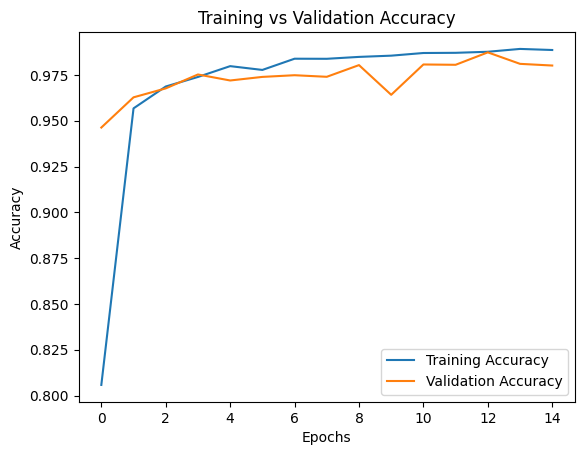

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


In [20]:
model.save("my_cnn_model.h5")
